In [35]:
from finlab.data import  Data
import pandas as pd

In [36]:
data = Data()
close = data.get('收盤價',2000)
high = data.get('最高價',2000)
low = data.get('最低價',2000)

In [2]:
1000 /50 /2

10.0

In [42]:
import talib
import matplotlib.pyplot as plt

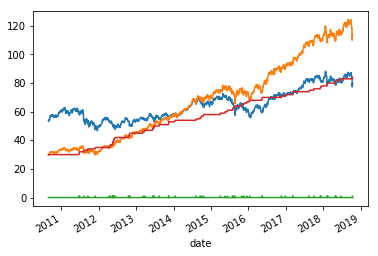

In [47]:
kd = talib.STOCH(high['0050'].ffill().values
                 ,low['0050'].ffill().values
                 ,close['0050'].ffill().values
                ,slowd_period=3,fastk_period=9,slowk_period=3,slowd_matype=1,slowk_matype = 1)
k = pd.Series(kd[0],index = close['0050'].index)
d = pd.Series(kd[1],index=close['0050'].index)

buy = (k>d) & (k.shift() <d.shift()) & (k<30)
# 利用 talib 來計算 0050 這檔股票的指標

# 將 kd 值 分別轉換成 k、d 兩條 series
k = pd.Series(kd[0], index=close['0050'].index)
d = pd.Series(kd[1], index=close['0050'].index)

kd = talib.STOCH(high['0050'].ffill().values, 
                 low['0050'].ffill().values, 
                 close['0050'].ffill().values,
                 fastk_period=9, slowk_period=3
                 , slowd_period=3, slowk_matype=1, slowd_matype=1)
arr  = [30]
for v,p in zip(buy[1:] , close['0050'].shift(-2) / close['0050'].shift(-1)):
    arr.append(arr[-1]*p + v)
%matplotlib inline

# 先畫出 0050 收盤價
close['0050'].plot(label = '0050')
# 畫出投資獲利
pd.Series(arr,index = close['0050'].index).plot(label = 'kd')
# 畫出買入的時間點
buy.astype(int).plot()
# 畫出一樣的金額假如放在銀行，的資產變化
(buy.astype(int).cumsum() + 30).plot(label = 'bank')